# Seaborn Tutorial - Beginner

This notebook is for who want to know how to work Seaborn library

Not sepecific way, just way to understand














## Index
### 1. Import Library & Read Data
### 2. Seaborn
- Countplot
- Distplot
- Kdeplot
- Boxplot
- Catplot(easy trick)
    - boxplot
    - violinplot
    - swarmplot
    - boxenplot
- Heatmap
- Clustermap
- Pointplot
- LMplot
- Jointplot
- Pairplot
- PairGrid



## 1. Import Libary & Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Set3') # You can use plt.style.use() function
import os
os.listdir('../input/students-performance-in-exams/')

['StudentsPerformance.csv']

In [2]:
data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
# read 5 data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
# get correlation
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [7]:
# check null data
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 2. Seaborn 

### Countplot

sns.countplot(data=dataname , x="column1", hue="column2")

hue = you can split with some option


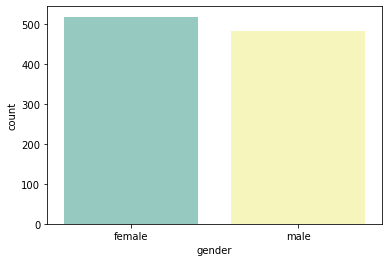

In [8]:
sns.countplot(data['gender'])
# sns.countplot(data=data,x='gender')  same meaning

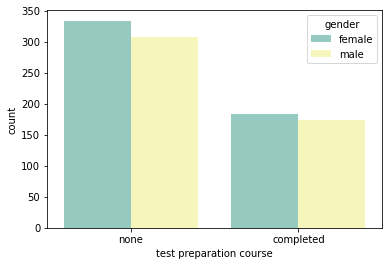

In [9]:
# hue option
sns.countplot(data=data,x='test preparation course',hue='gender')

Text(0.5, 1.0, 'Gender Ratio')

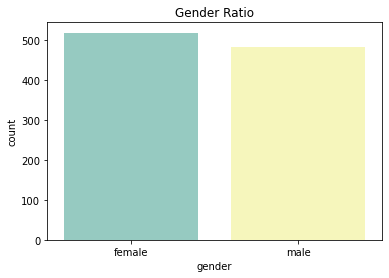

In [10]:
# title option
ax = sns.countplot(data['gender'])
ax.set_title('Gender Ratio') 

## Barplot

sns.barplot(data=train, x="column1", y="column2",hue="column3")

we dont have to set y-axis in countplot

but, we have to set y-axis in barplot and must be number


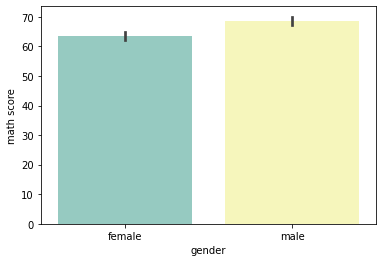

In [11]:
sns.barplot(data=data,x='gender',y='math score')

there is black line , if graph goes out black line 

it means there is outlier data

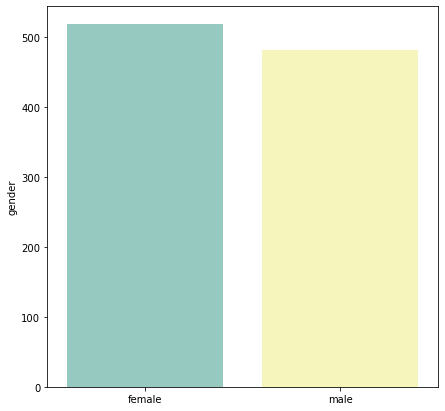

In [12]:
# fig = figure, ax = axes
# figure is frame for axes
# fig, ax = plt.subplots(row, column, order, figsize=(7,7)) 
# if you feel confuse, just move on

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.barplot(data['gender'].value_counts().index, data['gender'].value_counts())

In [13]:
def barp_xyz(x, y, hue):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    sns.barplot(x, y, hue=hue, data=data)

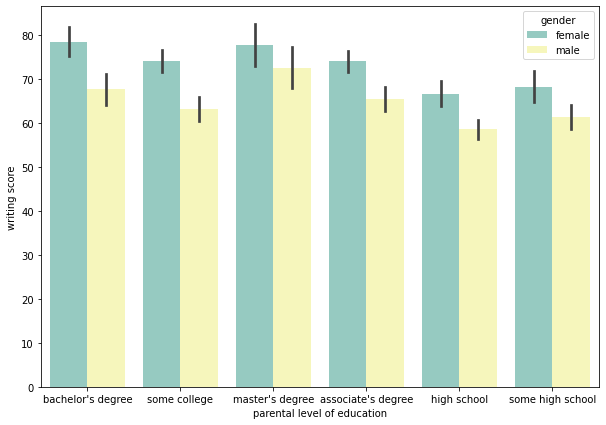

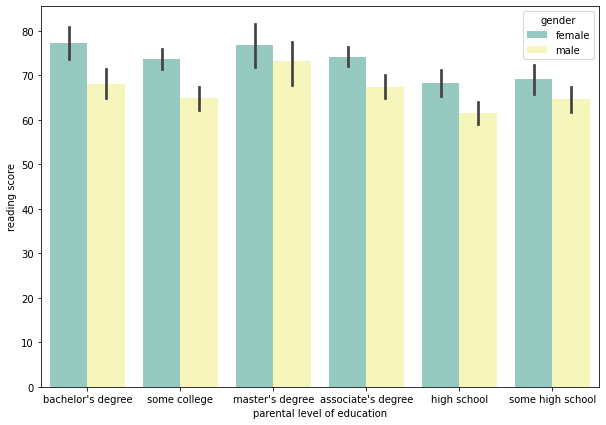

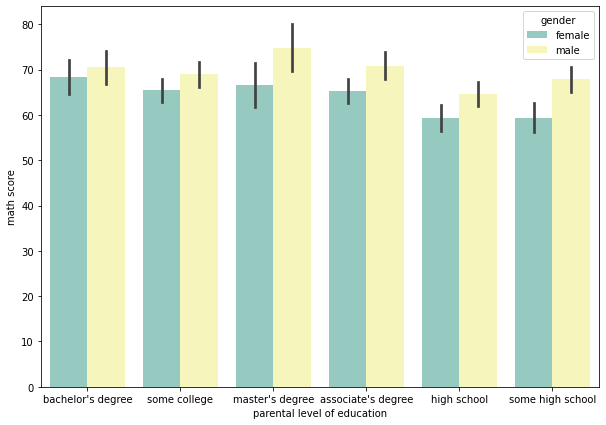

In [14]:
# we can use iterator for changing y-axis
for i in ['writing score', 'reading score', 'math score']:
    barp_xyz('parental level of education' ,i,'gender')

## Distplot

distplot is showing you numerical data histogram

sns.distplot(data,x = 'numerical data')

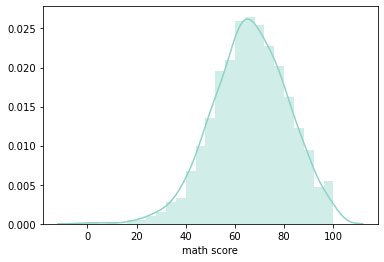

In [15]:
sns.distplot(data['math score'])

In [16]:
def distp_xyz(data, x, ax) :
    sns.distplot(data[x], ax=ax)

0 writing score
1 reading score
2 math score


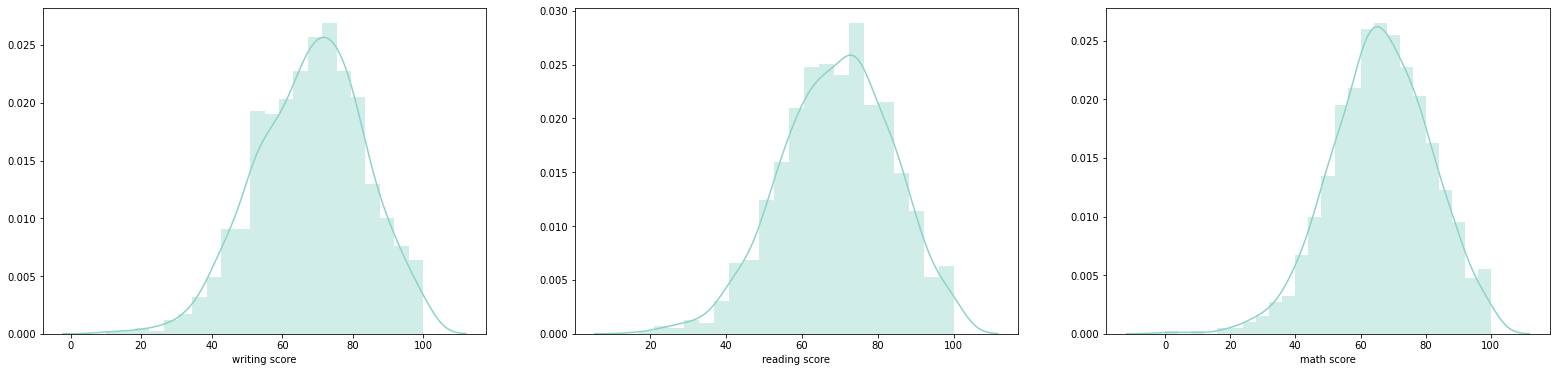

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(27,6))
for idx, i in enumerate(['writing score','reading score', 'math score']) :
    print(idx,i)
    distp_xyz(data,i,ax[idx])


## Kdeplot

(kernal density estimate, kde)

similar with distplot (numberical data)

sns.kdeplot(data['numberical data'], shade(color under the line)=True)


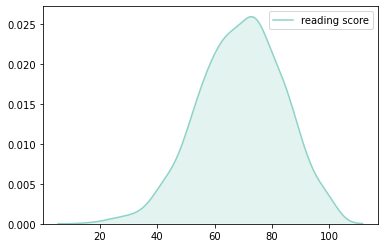

In [18]:
sns.kdeplot(data['reading score'],shade=True)

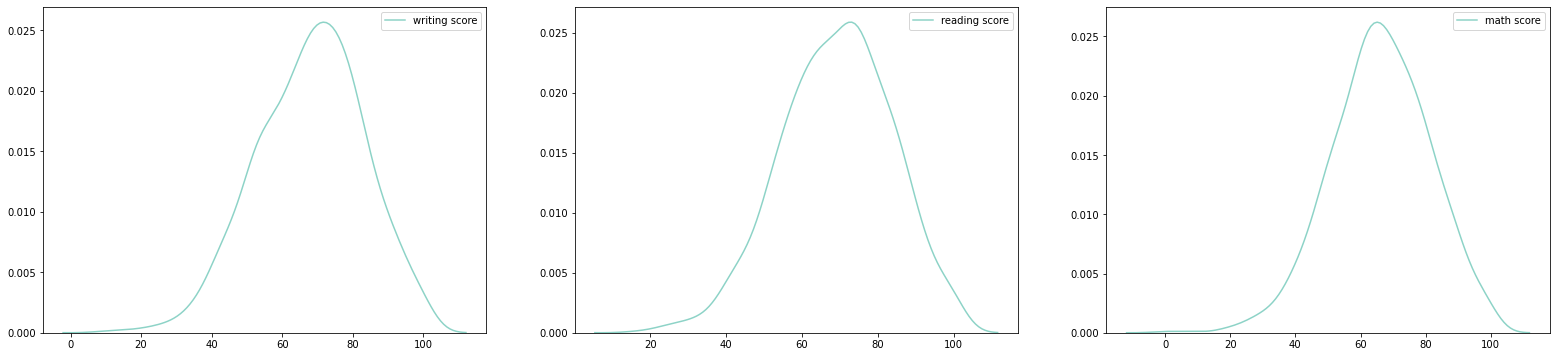

In [19]:
def kdep_xyz(data, x,ax):
    sns.kdeplot(data[x], ax=ax)

fig, ax = plt.subplots(1, 3, figsize=(27, 6))
for idx, i in enumerate(['writing score', 'reading score', 'math score']):
    kdep_xyz(data, i, ax[idx])

## Catplot

when you want to compare with category, this is useful

sns.catplot(x, y, hue=hue, data=data, ax=ax, kind=kind)

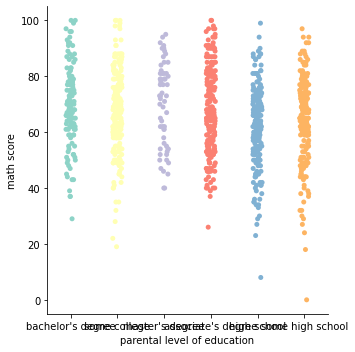

In [20]:
sns.catplot( data = data ,x = 'parental level of education',y = 'math score')

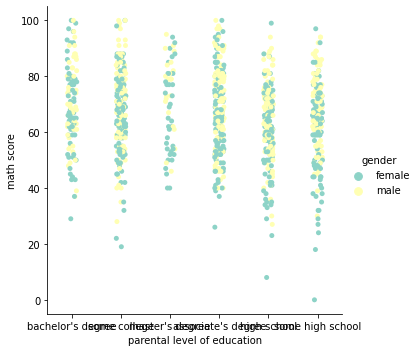

In [21]:
# hue option
sns.catplot( data = data ,x = 'parental level of education',y = 'math score',hue='gender')

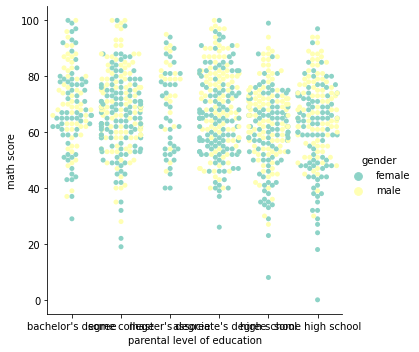

In [22]:
# kind option
sns.catplot( data = data ,x = 'parental level of education',y = 'math score',hue='gender', kind='swarm')

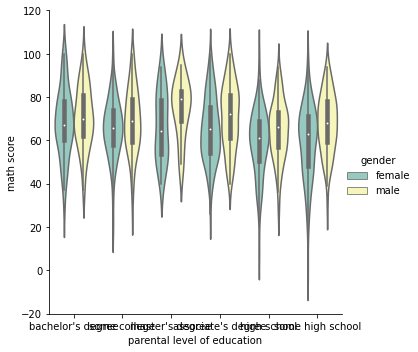

In [23]:
# kind option
sns.catplot( data = data ,x = 'parental level of education',y = 'math score',hue='gender', kind='violin')

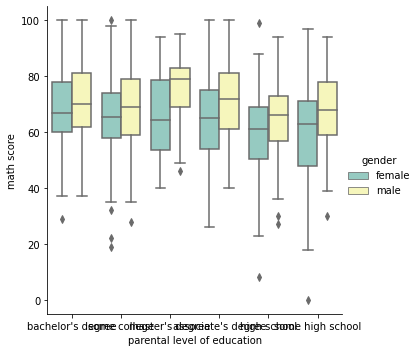

In [24]:
# kind option
sns.catplot( data = data ,x = 'parental level of education',y = 'math score',hue='gender', kind='box')

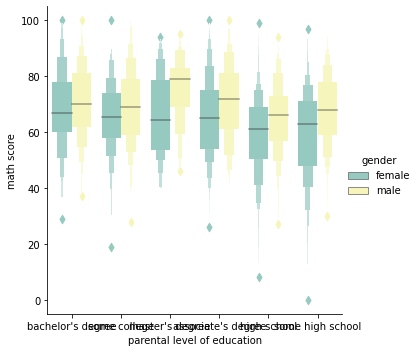

In [25]:
# kind option
sns.catplot( data = data ,x = 'parental level of education',y = 'math score',hue='gender', kind='boxen')

## Pointplot

if there is correlation between x-axis and y-axis

pointplot is more useful than barplot

sns.pointplot(data=data, x = 'x-axis',y = 'y-axis')

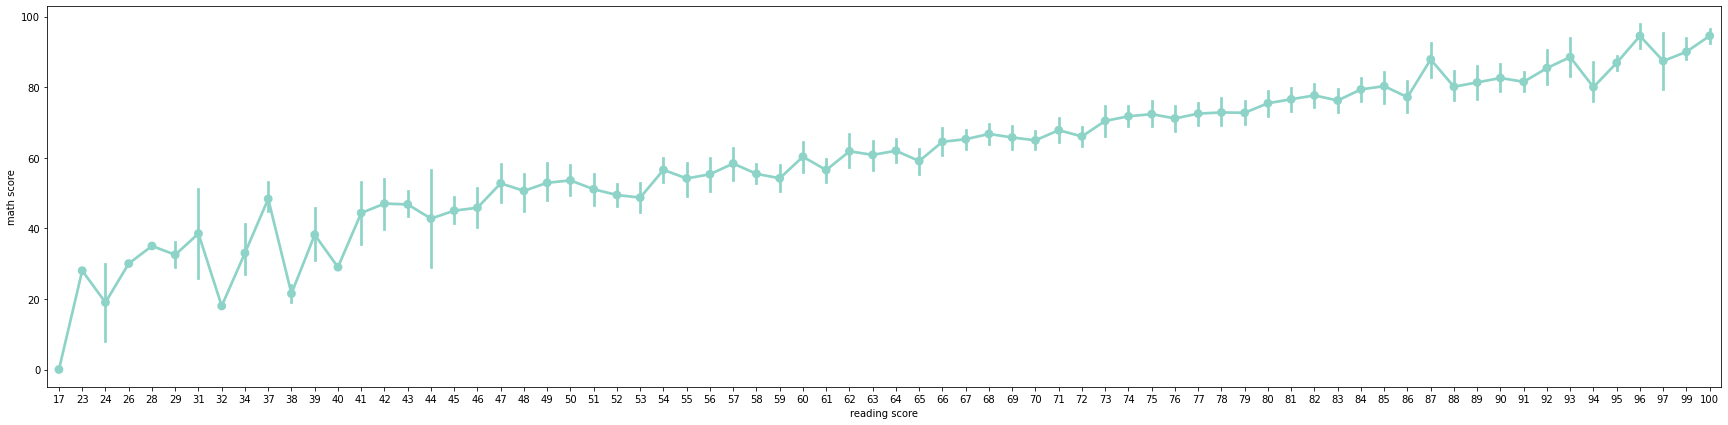

In [26]:
# change figure for x-axis 
plt.figure(figsize=(30,7))

sns.pointplot(data=data, x = 'reading score',y = 'math score')

## LMplot
if x-axis, y-axis both are consecutive numbers would be good

sns.lmplot(data=train, x="column1", y="column2",fit_reg=False)


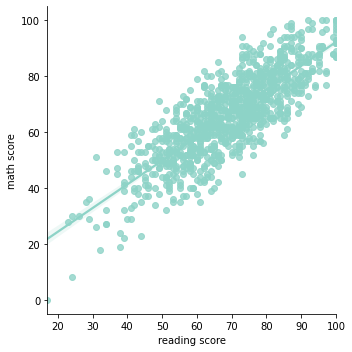

In [27]:
sns.lmplot(data=data, x = 'reading score',y = 'math score')

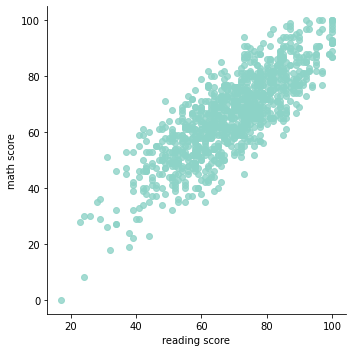

In [28]:
# fit_reg option
sns.lmplot(data=data, x = 'reading score',y = 'math score', fit_reg = False)

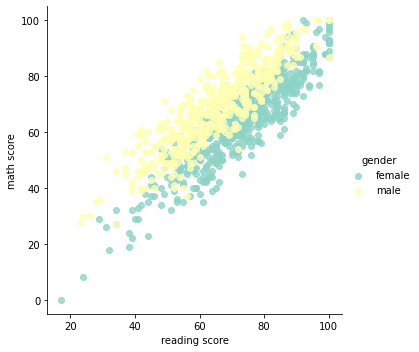

In [29]:
# hue option
sns.lmplot(data=data, x = 'reading score',y = 'math score', hue = 'gender', fit_reg = False)

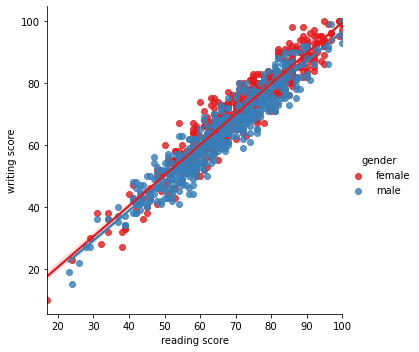

In [30]:
# palette option
ax = sns.lmplot(x='reading score', y='writing score', hue='gender', data=data, palette='Set1')

plt.show()

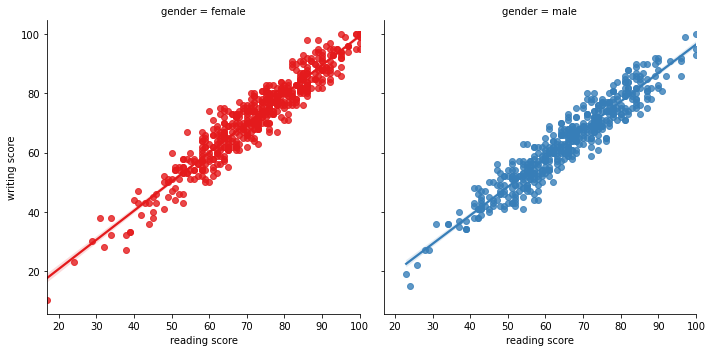

In [31]:
# col option
ax = sns.lmplot(x='reading score', y='writing score', hue='gender', col='gender', data=data, palette='Set1')

plt.show()

## Jointplot

when you want to see scatter plot and histogram at the same time

sns.jointplot(data=데이터프레임, x='column1', y='column2')


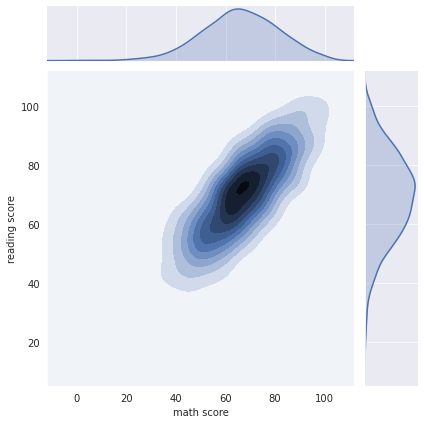

In [32]:
sns.set({'figure.figsize':(7,7)})
g = sns.jointplot('math score', 'reading score', data=data, kind='kde', space=0)
plt.tight_layout()
plt.show()

## Heatmap



sns.heatmap(data.corr(),linewidths=.5, annot=True, fmt="f", cmap="YlGnBu")

annot = put data in each cell

fmt = ".0%" > percentile

cmap = same option with palette

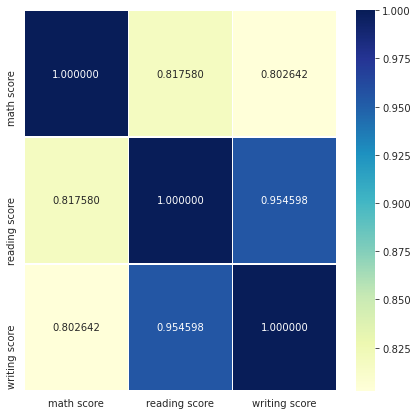

In [33]:
sns.heatmap(data.corr(),linewidths=.5, annot=True, fmt="f", cmap="YlGnBu")


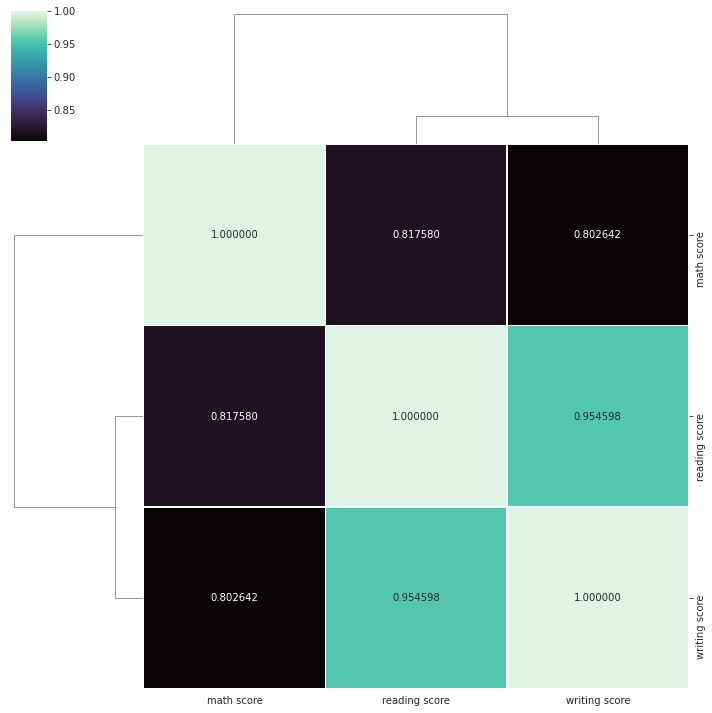

In [34]:
sns.clustermap(data.corr(),linewidths=.5, annot=True, fmt="f", cmap="mako")


## Pairplot

this is good for specific correlations

sns.pairplot(data = data , hue = column, vars = ["specific columns"])

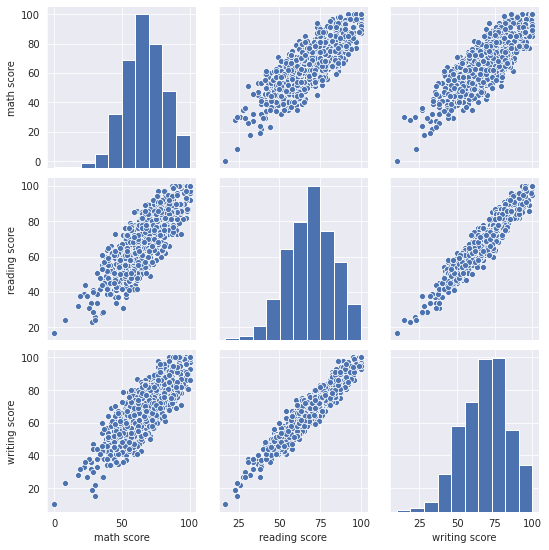

In [35]:
sns.pairplot(data)
plt.show()

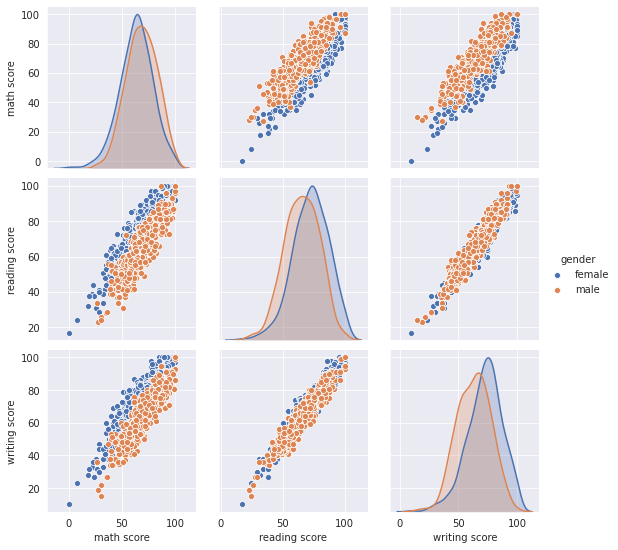

In [36]:
sns.pairplot(data, hue='gender')
plt.show()

## Pairgrid

similar with pairplot

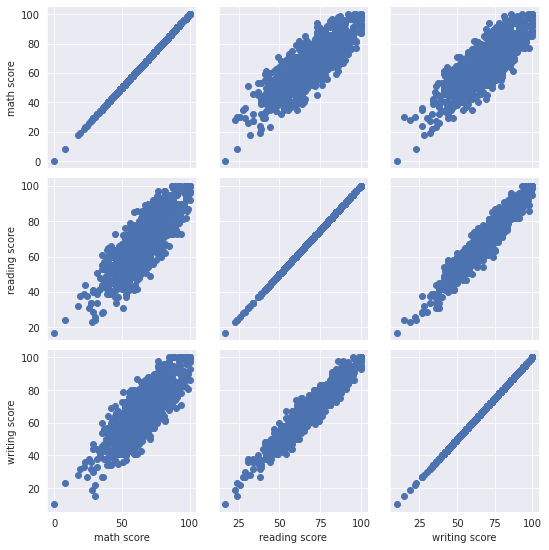

In [37]:
g = sns.PairGrid(data)
g.map(plt.scatter)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'shadow'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'shadow'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'shadow'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'shadow'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'shadow'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/conda/lib/python3.7/site-packages/seabor

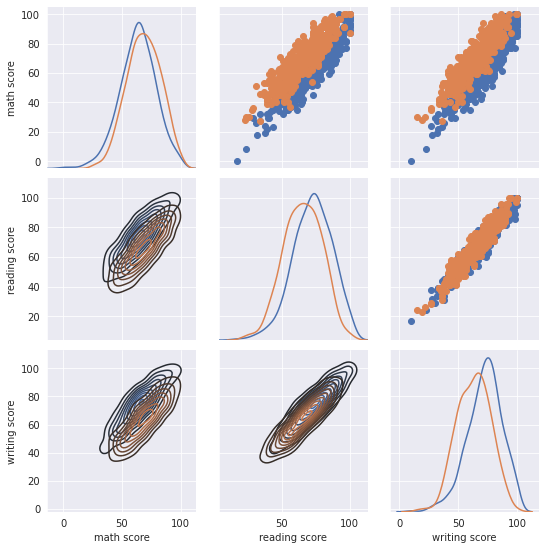

In [38]:
g = sns.PairGrid(data, hue='gender')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, shadow=True)
plt.show()